<a href="https://colab.research.google.com/github/atopatalos/example_repo_dibimbing/blob/main/Day6_assignment_Classification_WinequalityTest_PATALO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dataset: Wine Quality**

Name :Patalo "Paul" Selobakin




# **0. Preparation**

In [165]:
#import linear algebra and data manipulation libraries
import pandas as pd
import numpy as np

#import standard visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#import scipy statistical, standarscaller
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler , LabelEncoder
from scipy import stats
from sklearn import preprocessing
import warnings
import random

#import ML Classification Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#import for split
from sklearn.model_selection import train_test_split

#Evaluation
from sklearn.metrics import (roc_auc_score, roc_curve)
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report,accuracy_score
#!pip install scikit-plot
#import scikitplot as skplt

# **1. ETL Data (Extract Load)**

In [93]:
df = pd.read_csv('/content/sample_data/WineQT.csv')

# **2. Data Understanding**

The dataset describes the amount of various chemicals components present in wine and their effect on it's quality. - The datasets can be viewed as classification or regression tasks.
This data frame contains the following columns:


1.   fixed acidity
2.   volatile acidity
3.   citric acid
4.   residual sugar
5.   chlorides
7.   free sulfur dioxide
8.   total sulfur dioxide
9.   density
10.  pH
11.  sulphates
12.   alcohol
13.  quality



In [94]:
# Check the first few lines
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [95]:
# check the statistical description for each attributes
df.describe().round(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00
mean,8.31,0.53,0.27,2.53,0.09,15.62,45.91,1.00,3.31,0.66,10.44,5.66,804.97
std,1.75,0.18,0.20,1.36,0.05,10.25,32.78,0.00,0.16,0.17,1.08,0.81,464.00
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.74,0.33,8.40,3.00,0.00
25%,7.10,0.39,0.09,1.90,0.07,7.00,21.00,1.00,3.20,0.55,9.50,5.00,411.00
50%,7.90,0.52,0.25,2.20,0.08,13.00,37.00,1.00,3.31,0.62,10.20,6.00,794.00
75%,9.10,0.64,0.42,2.60,0.09,21.00,61.00,1.00,3.40,0.73,11.10,6.00,1209.50
max,15.90,1.58,1.00,15.50,0.61,68.00,289.00,1.00,4.01,2.00,14.90,8.00,1597.00


In [96]:
# check the shape of datasets
print("Shape datasets (Row, column):", df.shape)

Shape datasets (Row, column): (1143, 13)


In [97]:
# check data types and NULL value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [98]:
# Display all the columns
column_wine = df.columns
print(column_wine)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')


In [99]:
# It seems Quality is the target for classification
# Check how many unique values
print("The Quality Categories",df["quality"].unique())

The Quality Categories [5 6 7 4 8 3]


<ipython-input-100-a0f6bc3d316d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality',data=df, palette='RdBu_r')


<Axes: xlabel='quality', ylabel='count'>

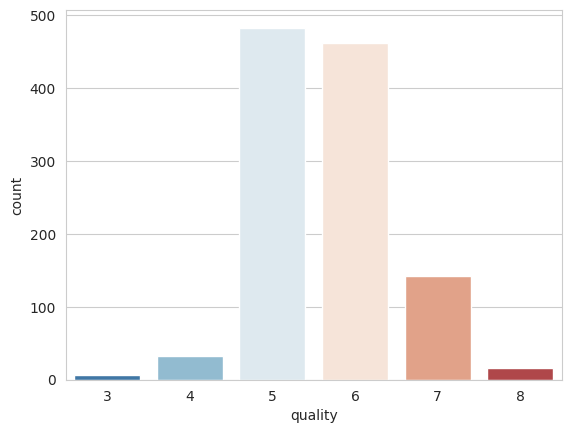

In [100]:
# Checking the imbalance data output "Quality"
sns.set_style('whitegrid')
sns.countplot(x='quality',data=df, palette='RdBu_r')

<Axes: xlabel='quality', ylabel='count'>

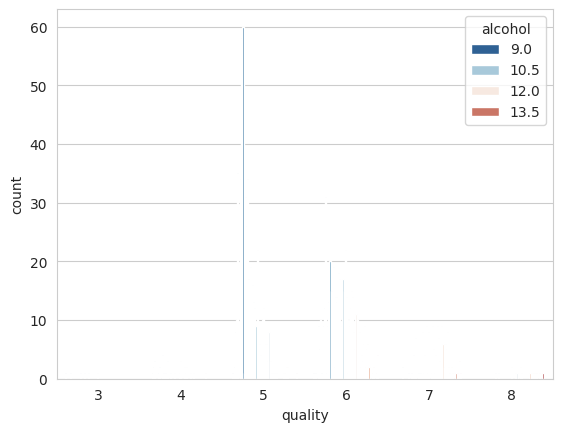

In [101]:
# Checking Quality vs Alcohol
sns.set_style('whitegrid')
sns.countplot(x='quality',hue='alcohol',data=df, palette='RdBu_r')

<Axes: >

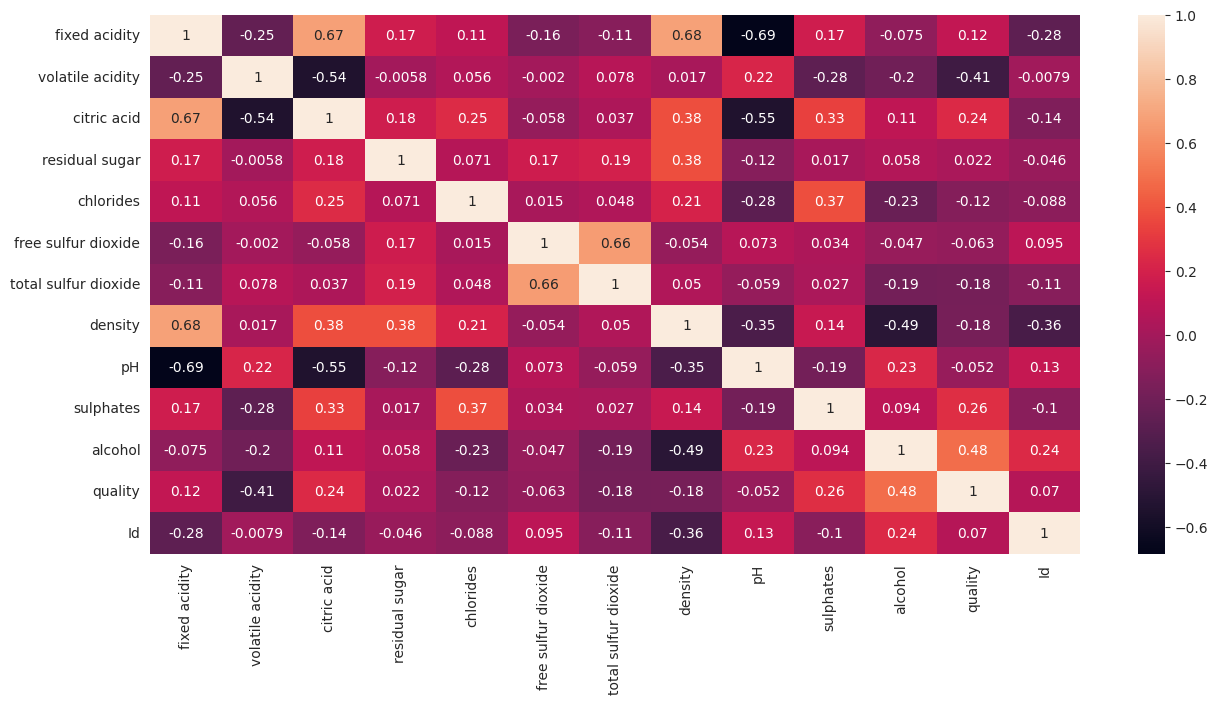

In [102]:
# Check correlation of attributes
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True)

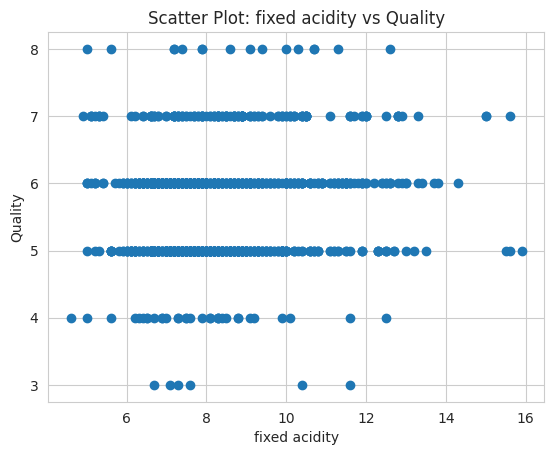

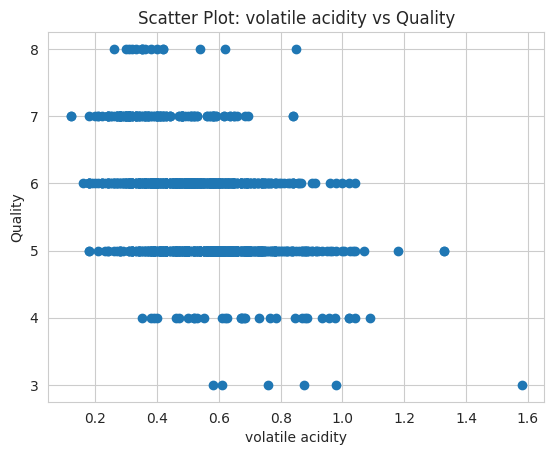

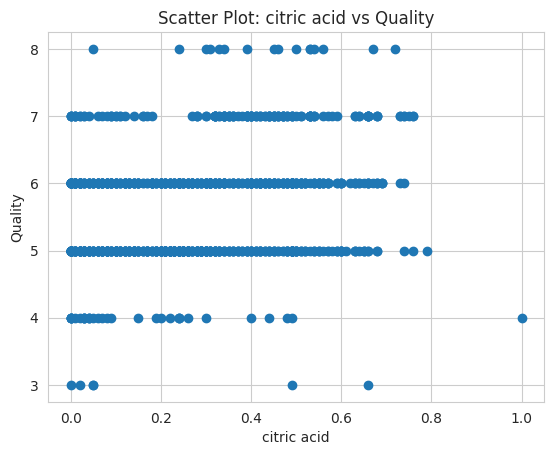

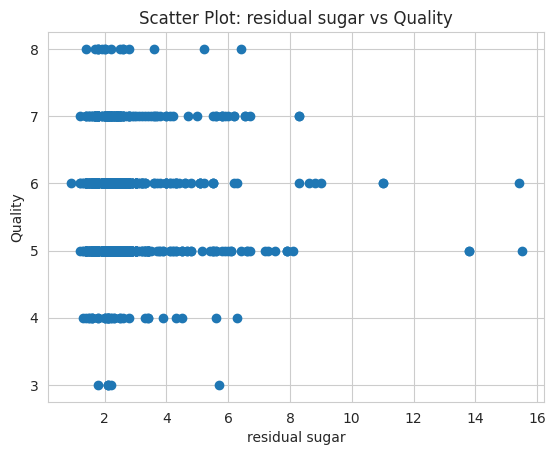

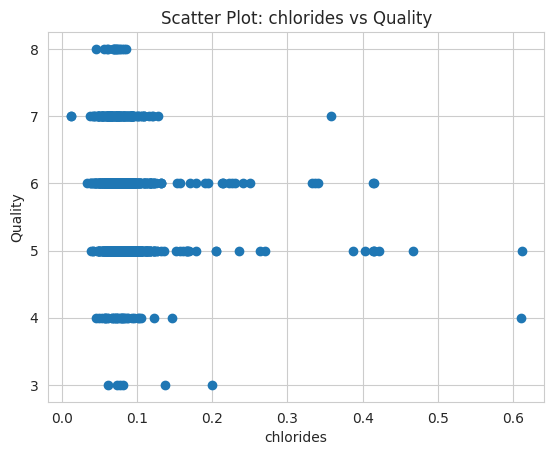

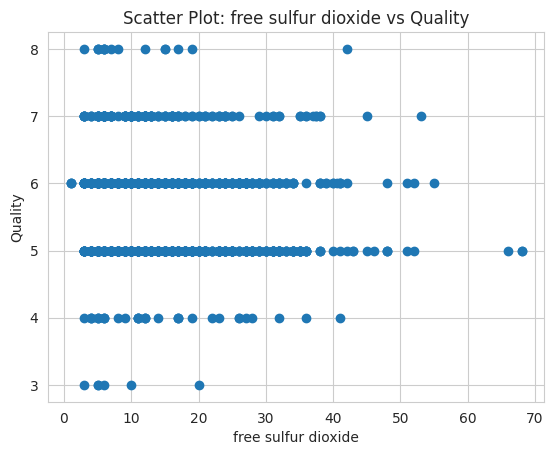

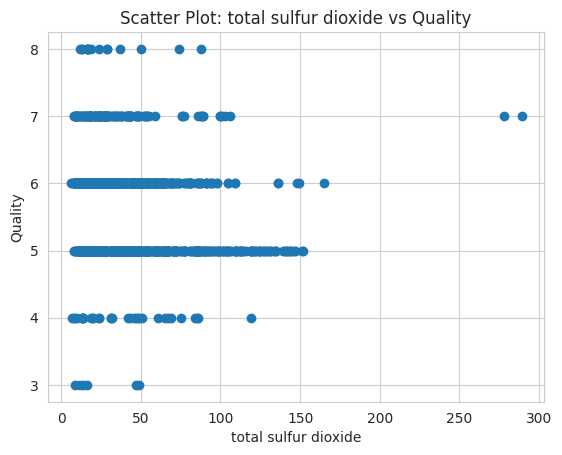

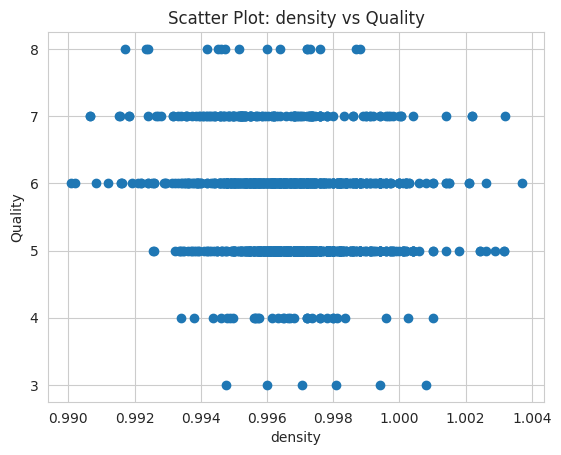

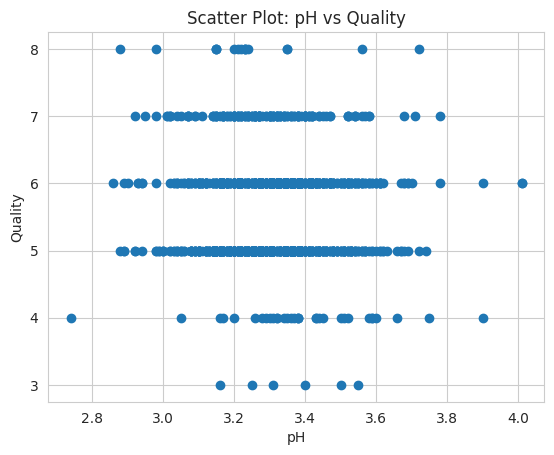

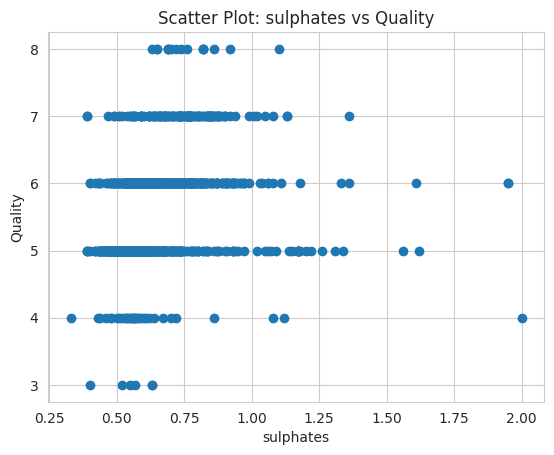

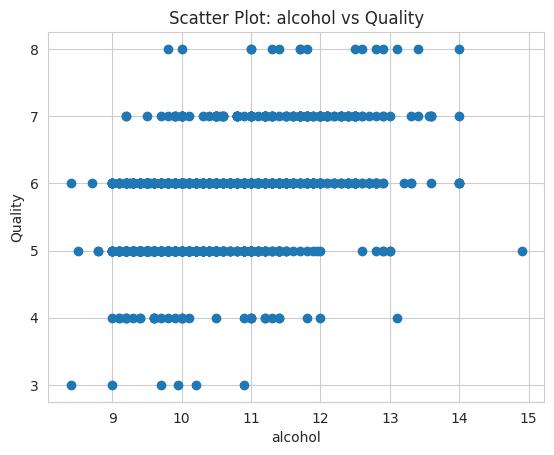

In [103]:
exclude_features = ['Id']

# Get all features except the excluded ones and quality
features = [col for col in df.columns if col not in exclude_features + ['quality']]

# Iterate and create scatter plots
for feature in features:
    plt.scatter(df[feature], df['quality'])
    plt.xlabel(feature)
    plt.ylabel('Quality')
    plt.title(f"Scatter Plot: {feature} vs Quality")
    plt.show()


# **3. Train-Test Split**

In [104]:
# Split Data (Train & Test)
X = df.copy()
# Splitting to avoid data leakage (train : test = 80% : 20%)
train , test = train_test_split(X,train_size=0.8, random_state=42,stratify=X.quality) #stratify to the target column

In [105]:
# Check the proportion of the Quality values for Train
train["quality"].value_counts()

5    386
6    370
7    114
4     26
8     13
3      5
Name: quality, dtype: int64

In [106]:
# Check the proportion of the Quality values for Test
test["quality"].value_counts()

5    97
6    92
7    29
4     7
8     3
3     1
Name: quality, dtype: int64

# **4. EDA (Exploratory Data Analysis)**

1.   View Describe, GroupBy, Linearity Affect for each attribute of Quality
2.   Check and prepare train, test datasets
3.   Further split train, test into X_train, y_train, X_test, y_test

**4.1 View Describe, GroupBy, Linearity Affect for each attribute of Quality**

In [107]:
# desciptive analysis for numerical columns
df.describe().round(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00
mean,8.31,0.53,0.27,2.53,0.09,15.62,45.91,1.00,3.31,0.66,10.44,5.66,804.97
std,1.75,0.18,0.20,1.36,0.05,10.25,32.78,0.00,0.16,0.17,1.08,0.81,464.00
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.74,0.33,8.40,3.00,0.00
25%,7.10,0.39,0.09,1.90,0.07,7.00,21.00,1.00,3.20,0.55,9.50,5.00,411.00
50%,7.90,0.52,0.25,2.20,0.08,13.00,37.00,1.00,3.31,0.62,10.20,6.00,794.00
75%,9.10,0.64,0.42,2.60,0.09,21.00,61.00,1.00,3.40,0.73,11.10,6.00,1209.50
max,15.90,1.58,1.00,15.50,0.61,68.00,289.00,1.00,4.01,2.00,14.90,8.00,1597.00


<Axes: >

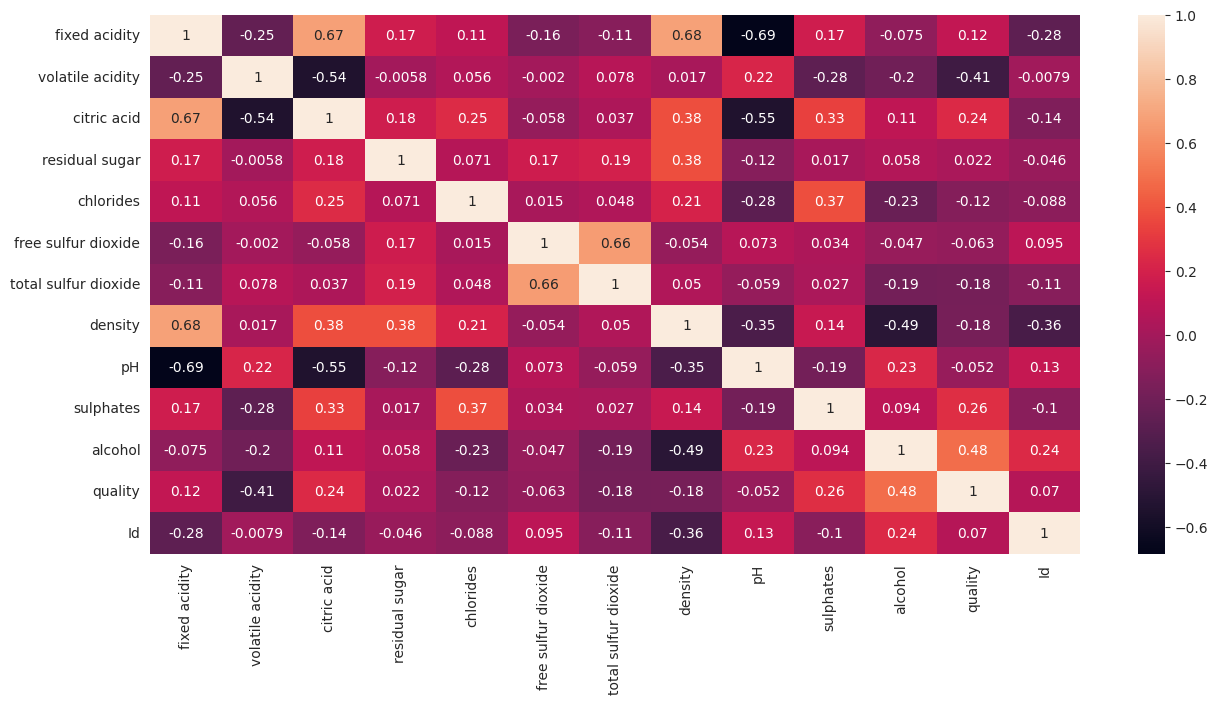

In [108]:
# Check correlation of attributes
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True)

In [109]:
# Checking for each attribute means grouped by quality
avg_quality = df.groupby("quality").mean().round(2)
avg_quality

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id
quality,,,,,,,,,,,,
3,8.45,0.90,0.21,2.67,0.11,8.17,24.50,1.0,3.36,0.55,9.69,1121.17
4,7.81,0.70,0.17,2.57,0.09,14.85,40.61,1.0,3.39,0.64,10.26,692.85
5,8.16,0.59,0.24,2.54,0.09,16.61,55.30,1.0,3.30,0.61,9.90,753.93
6,8.32,0.50,0.26,2.44,0.09,15.22,39.94,1.0,3.32,0.68,10.66,854.63
7,8.85,0.39,0.39,2.76,0.08,14.54,37.49,1.0,3.29,0.74,11.48,830.35
8,8.81,0.41,0.43,2.64,0.07,11.06,29.38,1.0,3.24,0.77,11.94,797.88


In [110]:
# Display all the columns
column_wine = df.columns
print(column_wine)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')


In [111]:
# Function to check effect of each attribute with the quality (Lineplot)
def line_plot_quality(df, attribute):
  plt.figure(figsize=(15,7))
  sns.lineplot(data=df, x='quality',y=attribute)

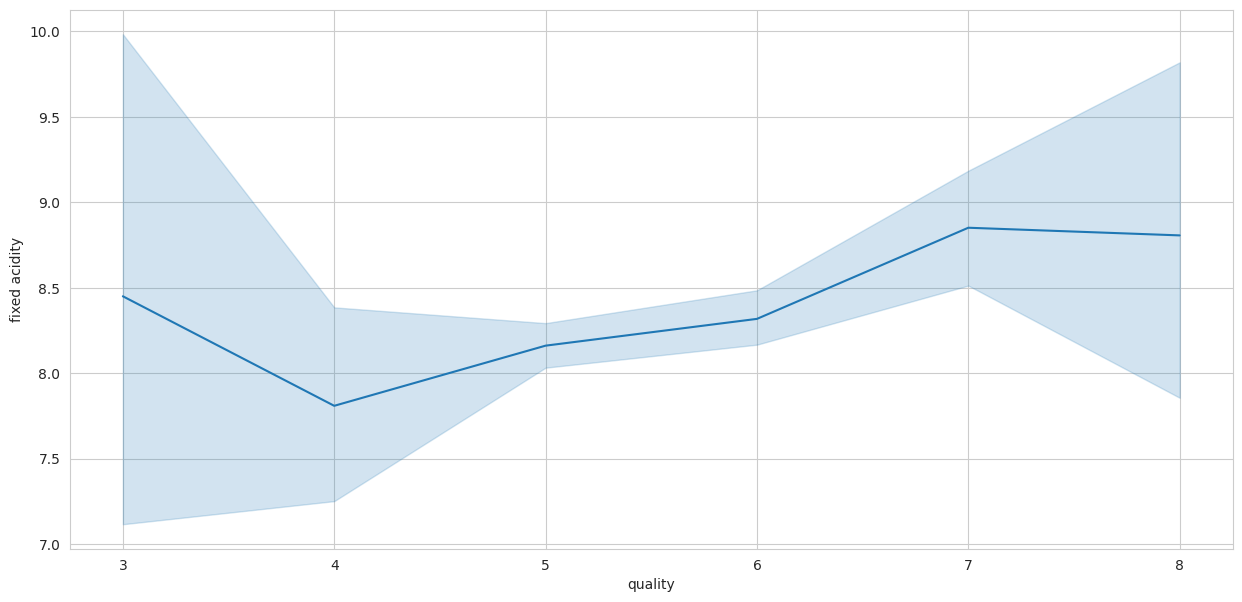

In [112]:
# check effect the Alcohol in the quality
line_plot_quality(df, attribute='fixed acidity')

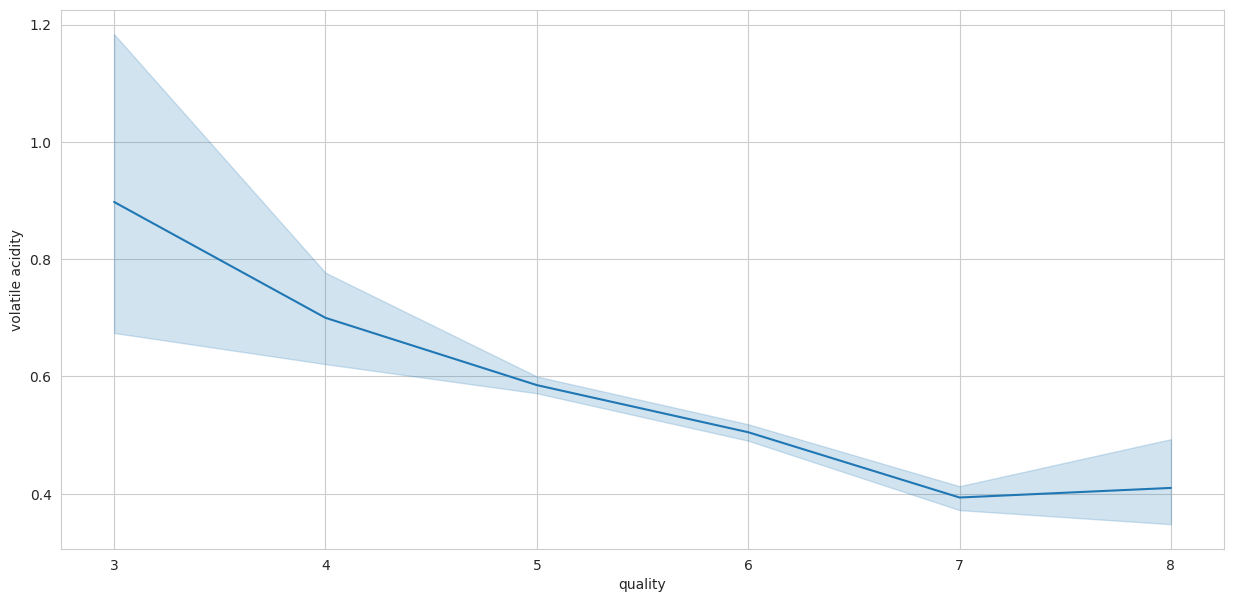

In [113]:
# check effect the Alcohol in the quality
line_plot_quality(df, attribute='volatile acidity')


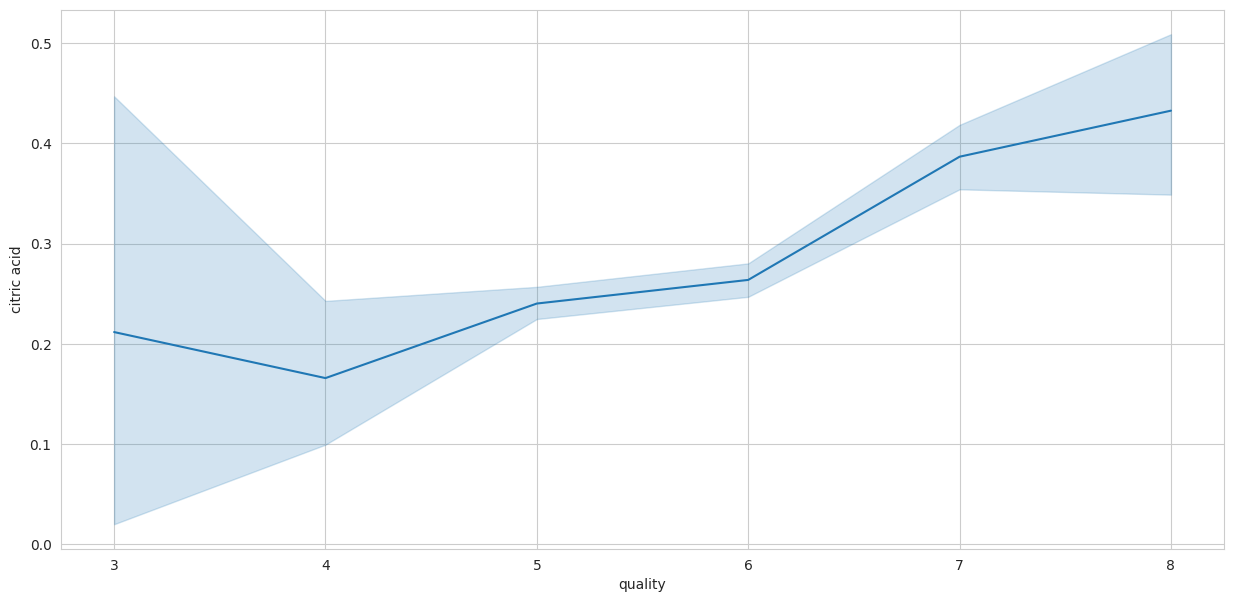

In [114]:
# check effect the Alcohol in the quality
line_plot_quality(df, attribute='citric acid')

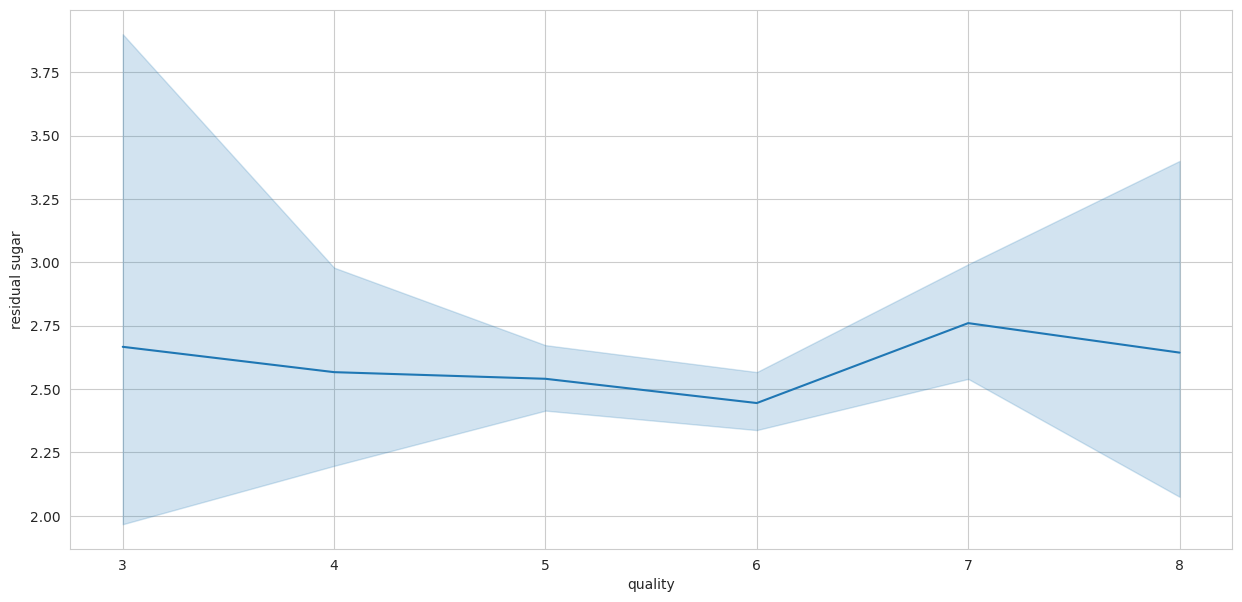

In [115]:
# check effect the Alcohol in the quality
line_plot_quality(df, attribute='residual sugar')

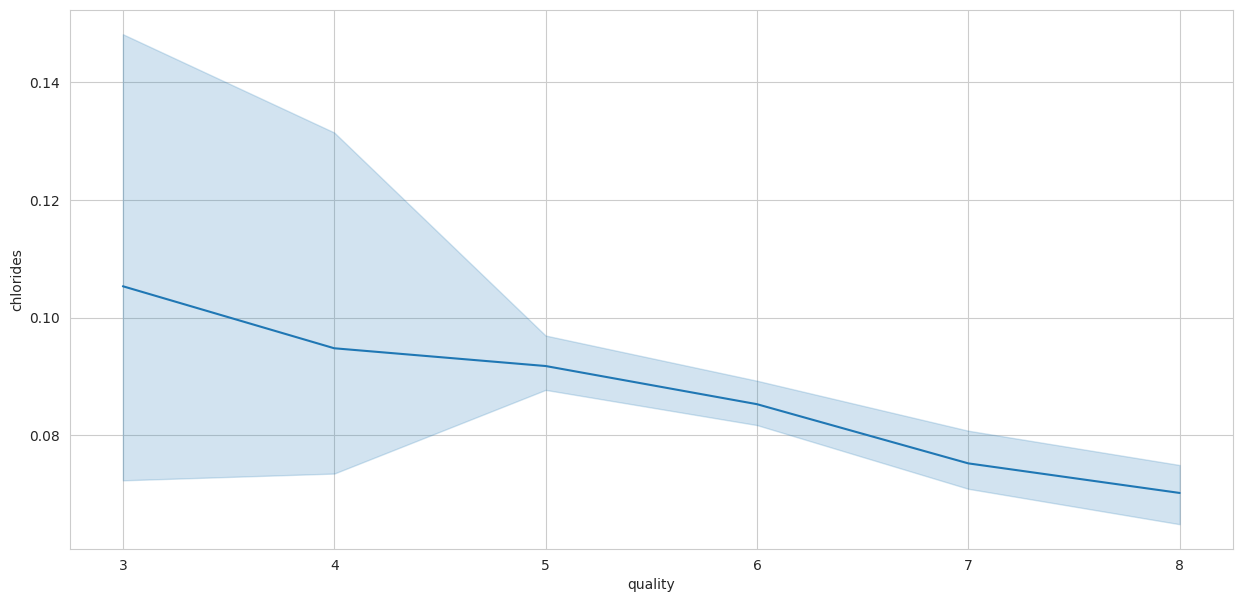

In [116]:
# check effect the Alcohol in the quality
line_plot_quality(df, attribute='chlorides')


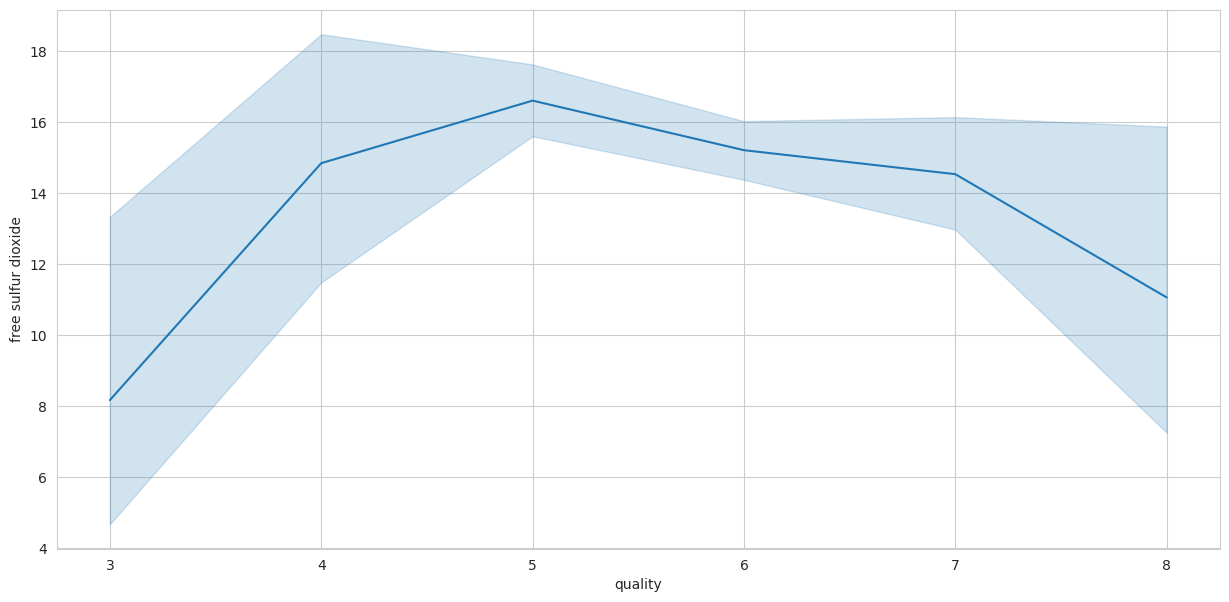

In [117]:
# check effect the Alcohol in the quality
line_plot_quality(df, attribute='free sulfur dioxide')

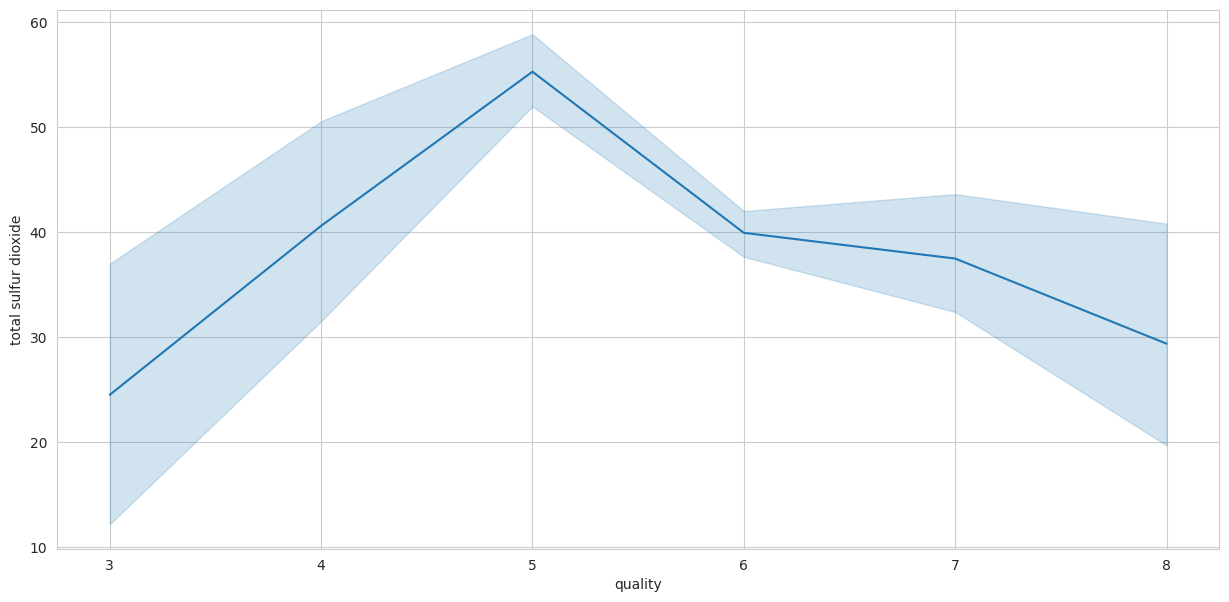

In [118]:
# check effect the Alcohol in the quality
line_plot_quality(df, attribute='total sulfur dioxide')

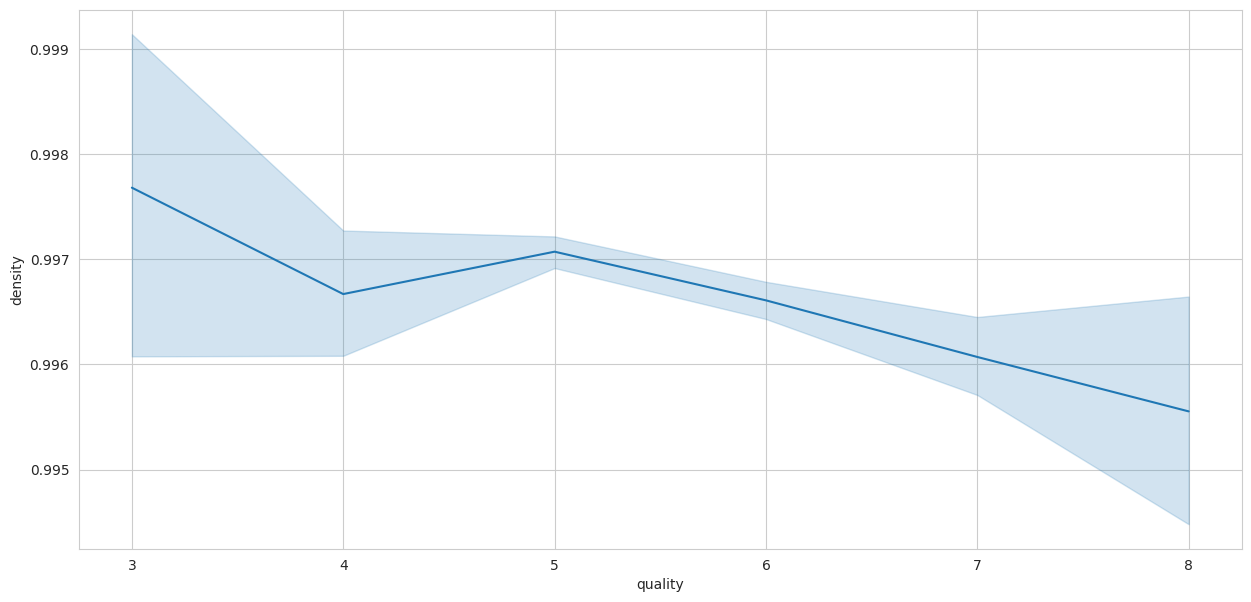

In [119]:
# check effect the Alcohol in the quality
line_plot_quality(df, attribute='density')

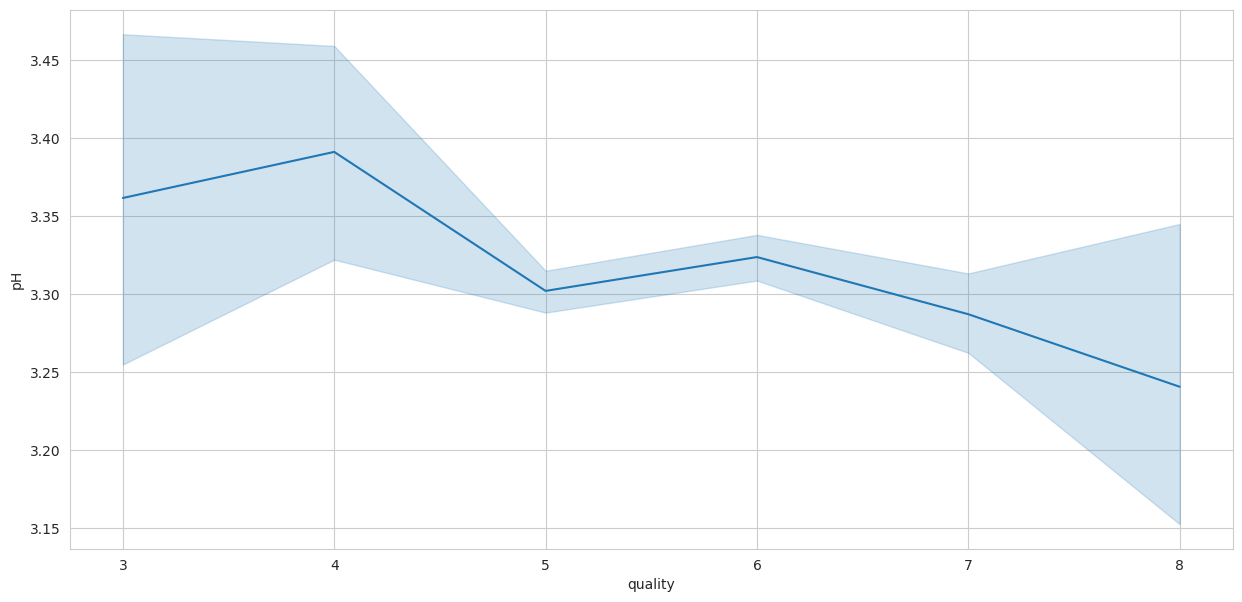

In [120]:
# check effect the Alcohol in the quality
line_plot_quality(df, attribute='pH')

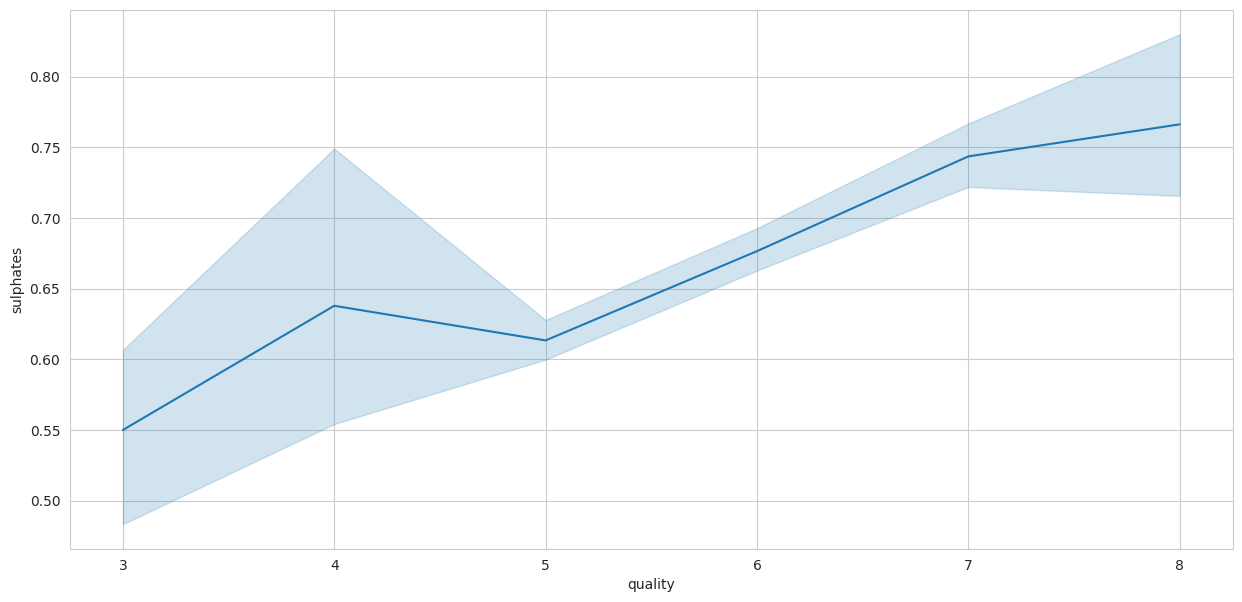

In [121]:
# check effect the Alcohol in the quality
line_plot_quality(df, attribute='sulphates')

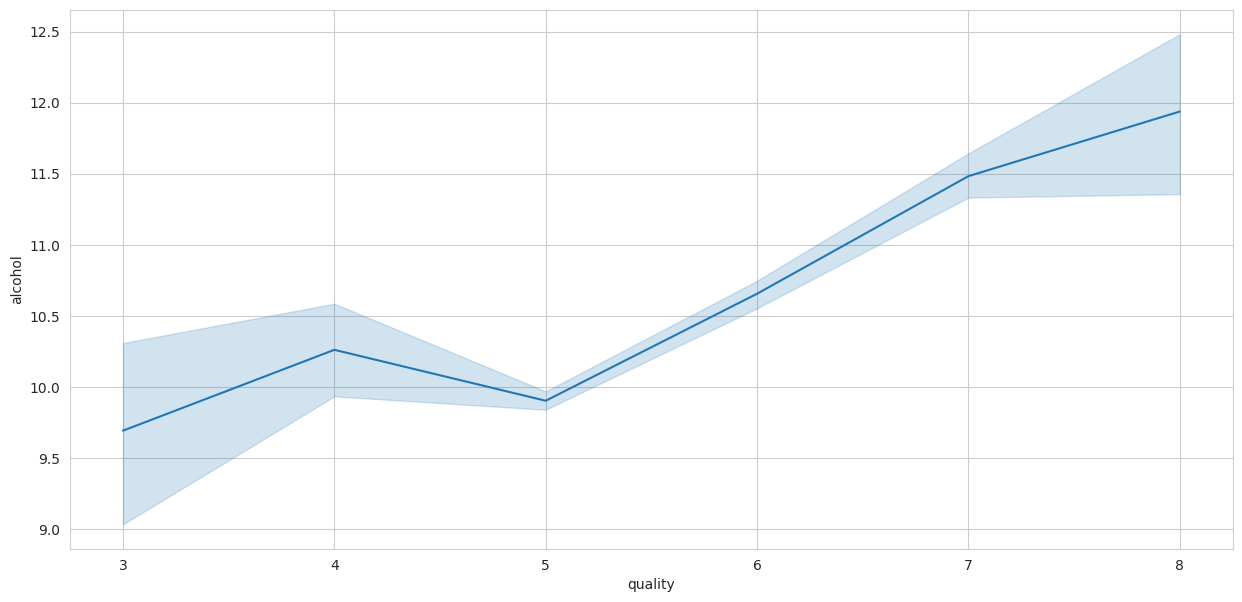

In [122]:
# check effect the Alcohol in the quality
line_plot_quality(df, attribute='alcohol')

Findings :
1) The following three components has positive linear correlation with a better quality of Alcohol.
Which means the higher the level of citric acid, Sulphates, and Alcohol the better (higher) Quality of the Wine.

1.   Citric acid
2.   Sulphates
3.   Alocohol

2) The following three components has neutral correlation with the quality.
quality of Alcohol.
Which means the amount of components doesn't affect much in the level of wine quality

4.   Fixed Acidity
5.   Residual Sugar
6.   Density

3) The following three components has negative linear correlation with the quality of Alcohol.
Which means the lower value of each component the lower quality of the wine
7.   Volatile Acidity
8.   chlorides




In [123]:
# High level check on Train dataset
train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
819,8.3,0.600,0.25,2.2,0.118,9.0,38.0,0.99616,3.15,0.53,9.8,5,1155
357,10.5,0.240,0.42,1.8,0.077,6.0,22.0,0.99760,3.21,1.05,10.8,7,504
385,9.5,0.460,0.49,6.3,0.064,5.0,17.0,0.99880,3.21,0.73,11.0,6,541
1057,5.6,0.620,0.03,1.5,0.080,6.0,13.0,0.99498,3.66,0.62,10.1,4,1480
161,8.9,0.590,0.50,2.0,0.337,27.0,81.0,0.99640,3.04,1.61,9.5,6,226
...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,6.7,0.280,0.28,2.4,0.012,36.0,100.0,0.99064,3.26,0.39,11.7,7,837
352,10.7,0.350,0.53,2.6,0.070,5.0,16.0,0.99720,3.15,0.65,11.0,8,498
818,9.6,0.420,0.35,2.1,0.083,17.0,38.0,0.99622,3.23,0.66,11.1,6,1153
94,7.2,0.415,0.36,2.0,0.081,13.0,45.0,0.99720,3.48,0.64,9.2,5,137


In [124]:
# High level check on Train dataset
test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
96,5.2,0.340,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6,142
442,8.8,0.600,0.29,2.2,0.098,5.0,15.0,0.99880,3.36,0.49,9.1,5,626
872,7.6,0.430,0.29,2.1,0.075,19.0,66.0,0.99718,3.40,0.64,9.5,5,1232
764,6.8,0.480,0.08,1.8,0.074,40.0,64.0,0.99529,3.12,0.49,9.6,5,1085
570,7.7,0.600,0.00,2.6,0.055,7.0,13.0,0.99639,3.38,0.56,10.8,5,793
...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,9.3,0.430,0.44,1.9,0.085,9.0,22.0,0.99708,3.28,0.55,9.5,5,851
71,8.1,0.545,0.18,1.9,0.080,13.0,35.0,0.99720,3.30,0.59,9.0,6,102
792,5.6,0.660,0.00,2.5,0.066,7.0,15.0,0.99256,3.52,0.58,12.9,5,1119
733,6.9,0.440,0.00,1.4,0.070,32.0,38.0,0.99438,3.32,0.58,11.4,6,1045


**4.2.a Train Dataset Preparation**

In [125]:
# Check the train shape
print("Train Rows, Column:", train.shape)

Train Rows, Column: (914, 13)


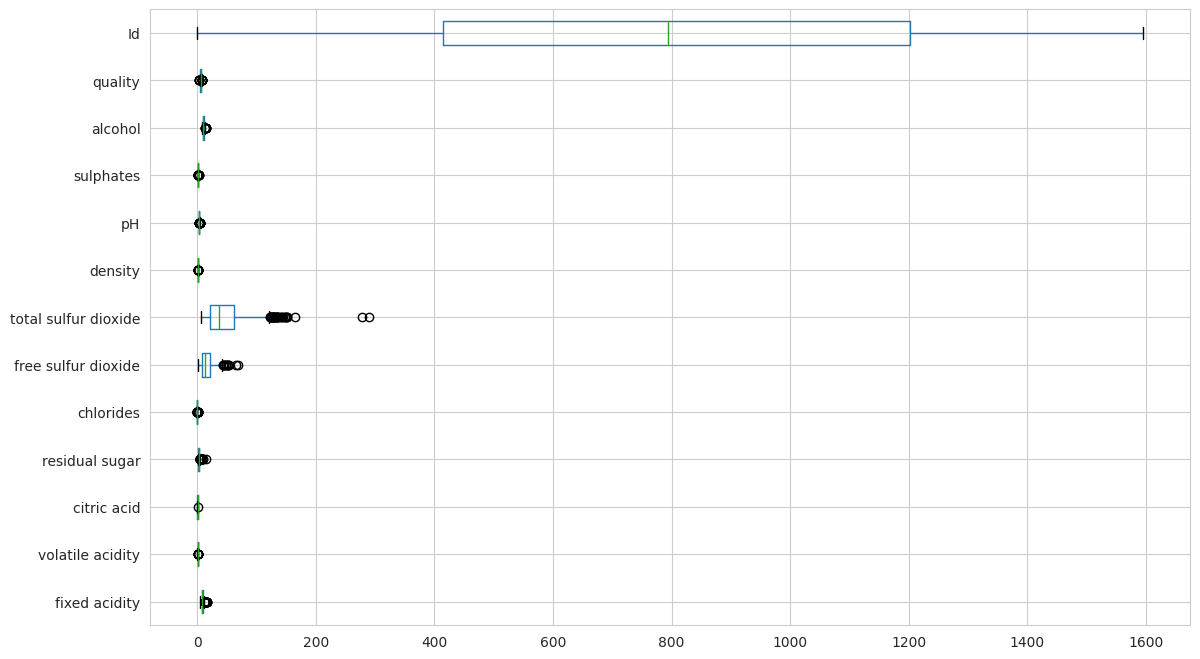

In [126]:
# Outlier Analysis

plt.figure(figsize=(16, 8))

# Create Boxplot
train.boxplot(vert=False)
plt.subplots_adjust(left=0.25)
plt.show()

In [127]:
# Check NULL rows
train.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [128]:
# Check NA rows
train.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

**4.2.b Train Dataset Preparation**

In [129]:
# Check the train shape
print("Test Rows, Column:", test.shape)

Test Rows, Column: (229, 13)


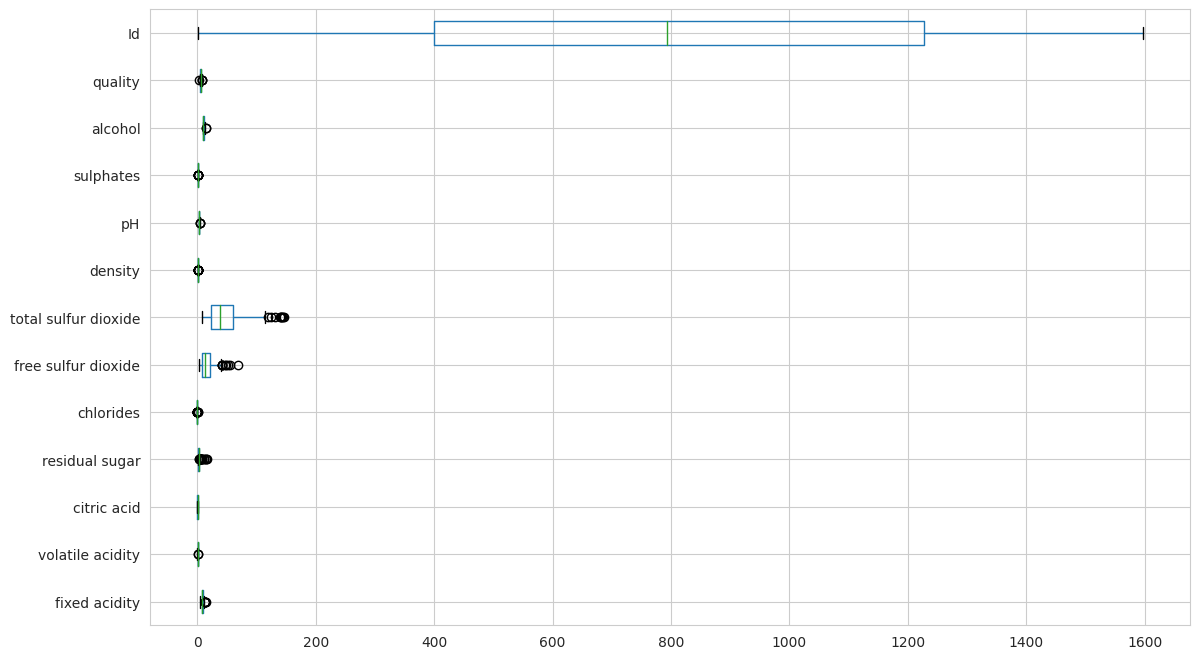

In [130]:
# Outlier Analysis

plt.figure(figsize=(16, 8))

# Create Boxplot
test.boxplot(vert=False)
plt.subplots_adjust(left=0.25)
plt.show()

In [131]:
# Check NULL rows
test.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [132]:
# Check NA rows
test.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

**4.3 Train, Test Split into X_train, y_train, X_test, y_test**

In [154]:
# Train dataset
Xtrain = train.drop(columns=['quality'])  # Drop the 'deposit' column
ytrain = train['quality']  # Select only the 'deposit' column

# Test dataset
Xtest = test.drop(columns=['quality'])  # Drop the 'deposit' column
ytest = test['quality']  # Select only the 'deposit' column



In [155]:
# Check X_train
Xtrain.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id
819,8.3,0.60,0.25,2.2,0.118,9.0,38.0,0.99616,3.15,0.53,9.8,1155
357,10.5,0.24,0.42,1.8,0.077,6.0,22.0,0.99760,3.21,1.05,10.8,504
385,9.5,0.46,0.49,6.3,0.064,5.0,17.0,0.99880,3.21,0.73,11.0,541
1057,5.6,0.62,0.03,1.5,0.080,6.0,13.0,0.99498,3.66,0.62,10.1,1480
161,8.9,0.59,0.50,2.0,0.337,27.0,81.0,0.99640,3.04,1.61,9.5,226


In [156]:
# Recheck the datasets
Xtrain.drop(columns=['Id'])

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
819,8.3,0.600,0.25,2.2,0.118,9.0,38.0,0.99616,3.15,0.53,9.8
357,10.5,0.240,0.42,1.8,0.077,6.0,22.0,0.99760,3.21,1.05,10.8
385,9.5,0.460,0.49,6.3,0.064,5.0,17.0,0.99880,3.21,0.73,11.0
1057,5.6,0.620,0.03,1.5,0.080,6.0,13.0,0.99498,3.66,0.62,10.1
161,8.9,0.590,0.50,2.0,0.337,27.0,81.0,0.99640,3.04,1.61,9.5
...,...,...,...,...,...,...,...,...,...,...,...
598,6.7,0.280,0.28,2.4,0.012,36.0,100.0,0.99064,3.26,0.39,11.7
352,10.7,0.350,0.53,2.6,0.070,5.0,16.0,0.99720,3.15,0.65,11.0
818,9.6,0.420,0.35,2.1,0.083,17.0,38.0,0.99622,3.23,0.66,11.1
94,7.2,0.415,0.36,2.0,0.081,13.0,45.0,0.99720,3.48,0.64,9.2


In [157]:
# Check Y_train
ytrain.head()

819     5
357     7
385     6
1057    4
161     6
Name: quality, dtype: int64

In [158]:
# Check X_test
Xtest.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id
96,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,142
442,8.8,0.60,0.29,2.2,0.098,5.0,15.0,0.99880,3.36,0.49,9.1,626
872,7.6,0.43,0.29,2.1,0.075,19.0,66.0,0.99718,3.40,0.64,9.5,1232
764,6.8,0.48,0.08,1.8,0.074,40.0,64.0,0.99529,3.12,0.49,9.6,1085
570,7.7,0.60,0.00,2.6,0.055,7.0,13.0,0.99639,3.38,0.56,10.8,793


In [159]:
# Recheck the datasets
Xtest.drop(columns=['Id'])

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
96,5.2,0.340,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0
442,8.8,0.600,0.29,2.2,0.098,5.0,15.0,0.99880,3.36,0.49,9.1
872,7.6,0.430,0.29,2.1,0.075,19.0,66.0,0.99718,3.40,0.64,9.5
764,6.8,0.480,0.08,1.8,0.074,40.0,64.0,0.99529,3.12,0.49,9.6
570,7.7,0.600,0.00,2.6,0.055,7.0,13.0,0.99639,3.38,0.56,10.8
...,...,...,...,...,...,...,...,...,...,...,...
607,9.3,0.430,0.44,1.9,0.085,9.0,22.0,0.99708,3.28,0.55,9.5
71,8.1,0.545,0.18,1.9,0.080,13.0,35.0,0.99720,3.30,0.59,9.0
792,5.6,0.660,0.00,2.5,0.066,7.0,15.0,0.99256,3.52,0.58,12.9
733,6.9,0.440,0.00,1.4,0.070,32.0,38.0,0.99438,3.32,0.58,11.4


In [161]:
# Check Y_train
ytest.head()

96     6
442    5
872    5
764    5
570    5
Name: quality, dtype: int64

In [163]:
print("X Train : ", Xtrain.shape)
print("X Test  : ", Xtest.shape)
print("Y Train : ", ytrain.shape)
print("Y Test  : ", ytest.shape)

X Train :  (914, 12)
X Test  :  (229, 12)
Y Train :  (914,)
Y Test  :  (229,)


## **5. Model Baseline, Selection and Implemention**

**5.1   Logistic Regression**

In [174]:
from sklearn.linear_model import LinearRegression ,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error ,mean_squared_error, median_absolute_error,confusion_matrix,accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC ,SVR

In [175]:
# Instantiate classifier
logistic_regression = LogisticRegression(solver='liblinear')

# Fit model to training data
logistic_regression.fit(Xtrain, ytrain)

LogisticRegression(solver='liblinear')

In [176]:
# Expected value Y using X test
ypred = logistic_regression.predict(Xtest)

In [177]:
# Predict test data on logistic regression
print(f"Test Accuracy : {logistic_regression.score(Xtest, ytest)*100} %" )
print(f"Train Accuracy : {logistic_regression.score(Xtrain, ytrain)*100} %" )

Test Accuracy : 64.19213973799127 %
Train Accuracy : 58.53391684901532 %


In [178]:
# Model Evaluation
print( f" Model Evaluation Logistic R : Mean Absolute Error/MAE is ", mean_absolute_error(ytest,ypred))
print(f" Model Evaluation Logistic R : Mean Squared  Error/MSE is " , mean_squared_error(ytest,ypred))
print(f" Model Evaluation Logistic R : Median Absolute Error/MAE is " ,median_absolute_error(ytest,ypred))

print(f" Model Evaluation Logistic R : Accuracy Score " , accuracy_score(ytest,ypred))

 Model Evaluation Logistic R : Mean Absolute Error/MAE is  0.40611353711790393
 Model Evaluation Logistic R : Mean Squared  Error/MSE is  0.5021834061135371
 Model Evaluation Logistic R : Median Absolute Error/MAE is  0.0
 Model Evaluation Logistic R : Accuracy Score  0.6419213973799127


**5.2   Linear Regression**

In [179]:
# Instantiate classifier
linear_regression = LinearRegression()

# Fit model to training data
linear_regression.fit(Xtrain, ytrain)

LinearRegression()

In [180]:
# Expected value Y using X test
ypred = logistic_regression.predict(Xtest)

In [181]:
# Predict test data on linear regression
print(f"Test Accuracy : {linear_regression.score(Xtest, ytest)*100} %" )
print(f"Train Accuracy : {linear_regression.score(Xtrain, ytrain)*100} %" )

Test Accuracy : 38.921648768133196 %
Train Accuracy : 36.98751577830583 %


# **Conclusion:**

 In this case, the model is able to make correct predictions for about 64% of the instances in the test set.

 A training accuracy of 58.53% suggests that the model is able to predict the target variable correctly for about 58.53% of the instances in the training set.